# How well do jobs and skills pay for Data Analyts?

## Methodology

* Evaluate median salary for top 6 data jobs
* Find median salary per skill for Data Analysts
* Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# filter for the job titles and country.
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [3]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

In [4]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [5]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

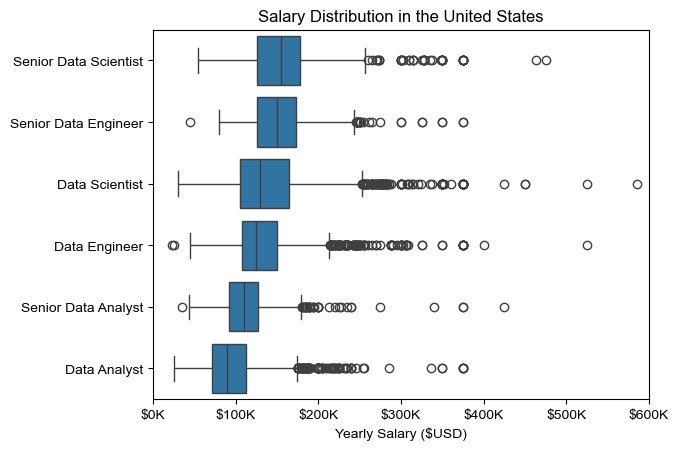

In [6]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style="ticks")

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()